In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [52]:
import matplotlib.pyplot as plt
import pandas as pd

## Load and Examine Dataset

# load and check dataset using pandas
data = pd.read_csv('/content/drive/MyDrive/BrentOilPrices.csv')
data.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


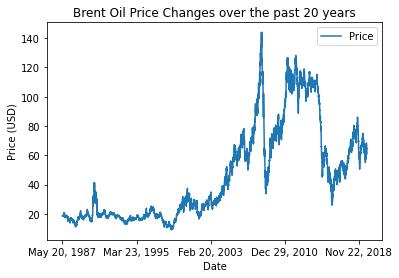

In [54]:
# Task A 

# a) Data Visualisation: Define simple line chart to give an idea of the stock
# price change Brent oil price information for the last 20 years 


#visualizing the data
data.plot(x='Date', y='Price', style='-')
plt.title('Brent Oil Price Changes over the past 20 years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [55]:
# b) Build explanatory variables — the features we are going to use to predict
# the price of oil. The variables we will be using at this stage, are the moving
# averages for the past three (MA3) and nine days (MA9), based on input
# from the oil stock market.


# Creating the variables 
#calculating the moving average for the past 3 and 9 days
MA3 = data['Price'].rolling(window = 3).mean()
MA9 = data['Price'].rolling(window = 9).mean()

#add the moving averages to the data frame
data['MA3'] = MA3
data['MA9'] = MA9

# Output the new DataFrame
data.head()

,Date,Price,MA3,MA9
0,"May 20, 1987",18.63,NaN,NaN
1,"May 21, 1987",18.45,NaN,NaN
2,"May 22, 1987",18.55,18.543333,NaN
3,"May 25, 1987",18.60,18.533333,NaN
4,"May 26, 1987",18.63,18.593333,NaN


In [56]:
#Check for NAN values

data.isnull().sum()

Date     0
Price    0
MA3      2
MA9      8
dtype: int64

In [57]:
#dropping NAN values
data.dropna(inplace = True)

In [96]:
# Output the new DataFrame after cleaning
data.head()

,Date,Price,MA3,MA9
8,"Jun 01, 1987",18.65,18.610000,18.587778
9,"Jun 02, 1987",18.68,18.636667,18.593333
10,"Jun 03, 1987",18.75,18.693333,18.626667
11,"Jun 04, 1987",18.78,18.736667,18.652222
12,"Jun 05, 1987",18.65,18.726667,18.657778


In [59]:
# c) Define the Train and Test Data: This step covers the preparation of the train
# data and the test data.

## Create the train and test dataset 
# X_train = data.iloc[:15,0].values 
# y_train = data.iloc[:15,1].values 
# X_test = data.iloc[15:,0].values 
# y_test = data.iloc[15:,1].values
  

#split the data into features and labels
X = data[['MA3', 'MA9']]
y = data['Price']


In [99]:
# d) Build a Linear Regression Model (LR) using the moving averages for the
# past three (MA3) and nine days (MA9) as inputs;

from sklearn.linear_model import LinearRegression

#fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

#Print the intercept and coefficients
print('Intercept:',model.intercept_)
print('Coefficient:',model.coef_)


Intercept: 0.018848229389256232
Coefficient: [ 1.2163066  -0.21667638]


In [ ]:
#predict the price
prediction = model.predict(data[['MA3', 'MA9']])
print(prediction)

In [62]:
# e) Prediction Function and Result: In this step, run the model using the test data
# we defined in step four. Visualise the predicted versus the actual stock values
# for the specific time period and calculate the model’s accuracy
import numpy as np

#calculate the model accuracy
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, prediction))
print('MSE:', metrics.mean_squared_error(y, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, prediction)))

MAE: 0.4882969040264387
MSE: 0.5817531992840815
RMSE: 0.7627274737965596


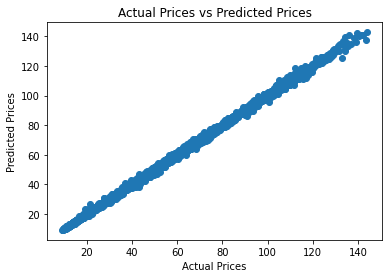

In [63]:
#visualise the predicted versus the actual stock values
import matplotlib.pyplot as plt

plt.scatter(y,prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [98]:
# f) Calculate the alpha and betas value: Define the linear regression equation using the
# alpha and betas values


#calculate the alpha and beta values
alpha = model.intercept_
beta1 = model.coef_[0]
beta2 = model.coef_[1]

#print the values
print("Alpha = ",alpha)
print("Beta1 = ",beta1)
print("Beta2 = ",beta2)


Alpha =  0.018848229389256232
Beta1 =  1.2163066015953519
Beta2 =  -0.21667637527323574


In [ ]:
#define the linear regression equation
def linear_regression_equation(MA3, MA9):
  prediction = alpha + beta1 * MA3 + beta2 * MA9
  return prediction

#predict the price
prediction = linear_regression_equation(MA3, MA9)
print("Predicted Price = ",prediction)

In [ ]:
# Task B

# a) Define the Train and Test Data: This step covers the preparation of the train
# data and the test data. Explain the techniques used to generate the train data and the
# test data for the given Brent oil price time series data set.

from sklearn.model_selection import train_test_split

#Splitting data into train and test sets
X = np.array(data['Date']).reshape(-1,1)
y = np.array(data['Price']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [100]:
#lmporting the Keras Libraries and packages 

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout

# Initialising the RNN 

reg = Sequential()

# Add layer one of LSTM
reg.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
reg.add(Dropout(0.2))

# Add layer two of LSTM
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Add layer three of LSTM
reg.add(LSTM(units = 50, return_sequences = True))
reg.add(Dropout(0.2))

# Add layer four of LSTM
reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

# Add layer of output
reg.add(Dense(units = 1))

# RNN compilation
reg.compile(optimizer = "adam", loss= "mean_squared_error")

# Fitting the RNN model
reg.fit(X, y, epochs = 200, batch_size = 32)

Epoch 1/200
257/257 [==============================] - 9s 7ms/step - loss: 2120.3323
Epoch 2/200
257/257 [==============================] - 2s 7ms/step - loss: 1425.6240
Epoch 3/200
257/257 [==============================] - 2s 6ms/step - loss: 997.8571
Epoch 4/200
257/257 [==============================] - 2s 7ms/step - loss: 703.0641
Epoch 5/200
257/257 [==============================] - 2s 7ms/step - loss: 512.1161
Epoch 6/200
257/257 [==============================] - 2s 7ms/step - loss: 380.7594
Epoch 7/200
257/257 [==============================] - 2s 7ms/step - loss: 284.9891
Epoch 8/200
257/257 [==============================] - 2s 7ms/step - loss: 215.9508
Epoch 9/200
257/257 [==============================] - 2s 6ms/step - loss: 167.8453
Epoch 10/200
257/257 [==============================] - 2s 7ms/step - loss: 129.8502
Epoch 11/200
257/257 [==============================] - 2s 7ms/step - loss: 97.2913
Epoch 12/200
257/257 [==============================] - 2s 9ms/step - los

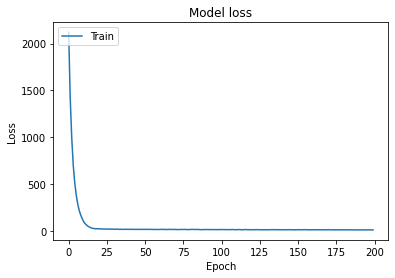

In [101]:
# Plot the training loss

plt.plot(reg.history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train"], loc = "upper left")
plt.show()
